Simulation start
iter   objective    pri res    dua res    rho        time
   1   0.0000e+00   0.00e+00   0.00e+00   1.00e-01   2.28e-04s
  25   0.0000e+00   0.00e+00   0.00e+00   1.00e-01   1.54e-03s

status:               solved
number of iterations: 25
optimal objective:    0.0000
run time:             1.79e-03s
optimal rho estimate: 1.00e-06

calc time:0.027007102966308594[sec]


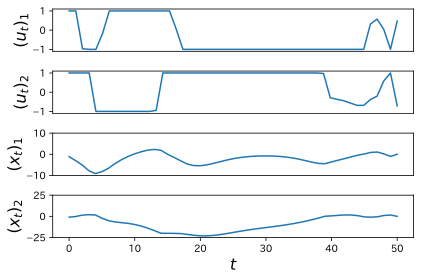

In [14]:
import time
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import constants
print("Simulation start")

dt = constants.dt
beta = constants.beta
M11 = 86.80879
M33 = 86.80879
M55 = 86.80879*0.782**2

#T=3
A11 = 2 
A33 = 223
A55 = 137
B11 = 0.28
B33 = 386
B55 = 18.4

C11 = 0
C33 = 11014
C55 = 6233

P = 1/((M11+A11)+0.5*dt*B11+beta*dt**2*C11)

n = 3
m = 1
T = 5

a11 = 1-beta*dt**2/P*C11
a12 = dt-beta*dt**2/P*(B11+C11*dt)
a13 = (0.5-beta)*dt**2-beta*dt**2/P*(B11*dt/2 + (0.5-beta)*C11*dt**2)
a21 = -0.5/P*C11
a22 = -0.5/P*(B11+C11*dt-2*P)
a23 = -0.5/P*(B11*dt/2 + (0.5-beta)*C11*dt**2 - P)
a31 = -1/P*C11
a32 = -1/P*(B11+C11*dt)
a33 = -1/P*(B11*dt/2 + (0.5-beta)*C11*dt**2)

b1  = beta*dt**2/P
b2  = 0.5/P
b3  = 1/P

A = 1/P * np.array([a11,a12,a13],[a21,a22,a23],[a31,a32,a33]) #(n,n)
B = np.array([[b1],[b2],[b3]]) #(n,m)
x_0 = beta*np.random.randn(n)

x = cp.Variable((n, T+1))
u = cp.Variable((m, T))

cost = 0
constr = []
for t in range(T):
    cost += cp.sum_squares(x[:,t+1]) + cp.sum_squares(u[:,t])
    constr += [x[:,t+1] == A@x[:,t] + B@u[:,t] +B@w[:,t],
               cp.norm(u[:,t], 'inf') <= 1]
# sums problem objectives and concatenates constraints.
constr += [x[:,T] == 0, x[:,0] == x_0]
problem = cp.Problem(cp.Minimize(cost), constr)
problem.solve(solver=cp.ECOS)

start = time.time()
result=prob.solve(verbose=True)
elapsed_time = time.time() - start
print ("calc time:{0}".format(elapsed_time) + "[sec]")

if result == float("inf"):
    print("Cannot optimize")
    import sys
    sys.exit()

# Plot results.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

f = plt.figure()

# Plot (u_t)_1.
ax = f.add_subplot(411)
plt.plot(u[0,:].value)
plt.ylabel(r"$(u_t)_1$", fontsize=16)
plt.yticks(np.linspace(-1.0, 1.0, 3))
plt.xticks([])

# Plot (u_t)_2.
plt.subplot(4,1,2)
plt.plot(u[1,:].value)
plt.ylabel(r"$(u_t)_2$", fontsize=16)
plt.yticks(np.linspace(-1, 1, 3))
plt.xticks([])

# Plot (x_t)_1.
plt.subplot(4,1,3)
x1 = x[0,:].value
plt.plot(x1)
plt.ylabel(r"$(x_t)_1$", fontsize=16)
plt.yticks([-10, 0, 10])
plt.ylim([-10, 10])
plt.xticks([])

# Plot (x_t)_2.
plt.subplot(4,1,4)
x2 = x[1,:].value
plt.plot(range(51), x2)
plt.yticks([-25, 0, 25])
plt.ylim([-25, 25])
plt.ylabel(r"$(x_t)_2$", fontsize=16)
plt.xlabel(r"$t$", fontsize=16)
plt.tight_layout()
plt.show()

Variable((4,))

In [6]:
sum_squares([1,2,3])

Expression(CONSTANT, NONNEGATIVE, ())